200 случайных значений из биномиального распределения с параметрами n =  8 p =  0.68900
[5 3 2 6 5 5 8 6 5 7 6 4 7 5 7 6 3 5 7 5 2 6 5 8 4 7 6 6 5 6 8 8 5 6 5 3 6
 4 6 7 8 4 4 7 4 4 6 7 6 5 6 7 7 7 7 6 5 5 4 5 5 4 4 5 3 7 4 7 8 7 8 7 6 5
 4 6 6 6 5 5 6 5 5 3 6 7 5 4 7 6 6 6 5 7 6 7 5 5 3 6 5 8 7 7 7 4 4 5 8 5 6
 4 7 5 5 6 5 4 4 5 7 4 7 7 5 4 6 8 7 5 6 3 5 6 5 6 3 2 7 6 5 6 7 4 3 8 4 4
 6 6 4 7 7 4 5 7 7 5 8 4 5 2 4 4 3 5 6 5 4 8 7 7 8 5 6 6 6 4 5 6 4 5 4 5 6
 7 5 6 6 6 7 7 8 5 8 6 6 2 5 5]
       X Frequency Relative Frequency Cumulative Frequency
0      2   5.00000            0.02500              0.02500
1      3  10.00000            0.05000              0.07500
2      4  32.00000            0.16000              0.23500
3      5  51.00000            0.25500              0.49000
4      6  47.00000            0.23500              0.72500
5      7  39.00000            0.19500              0.92000
6      8  16.00000            0.08000              1.00000
7  Total       200               

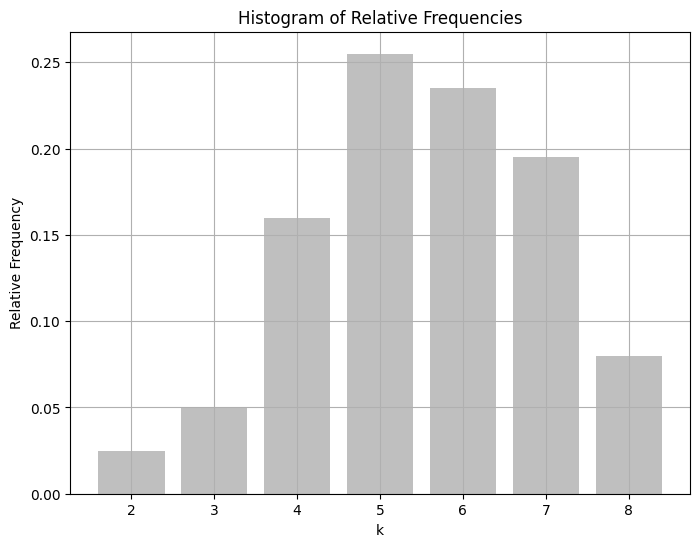

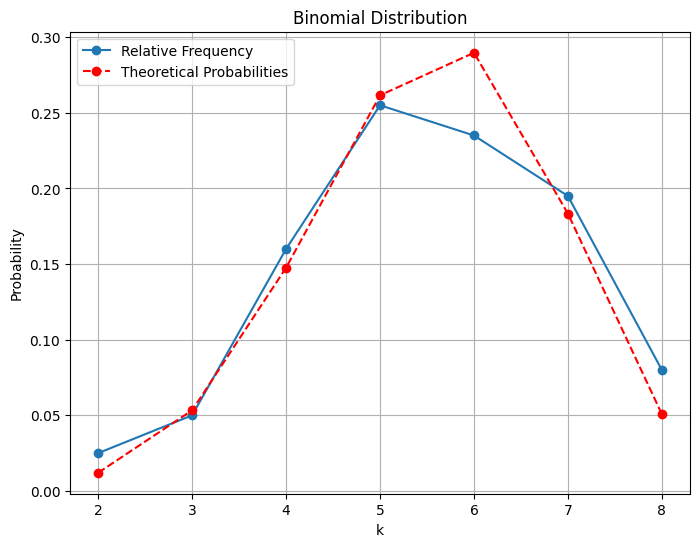

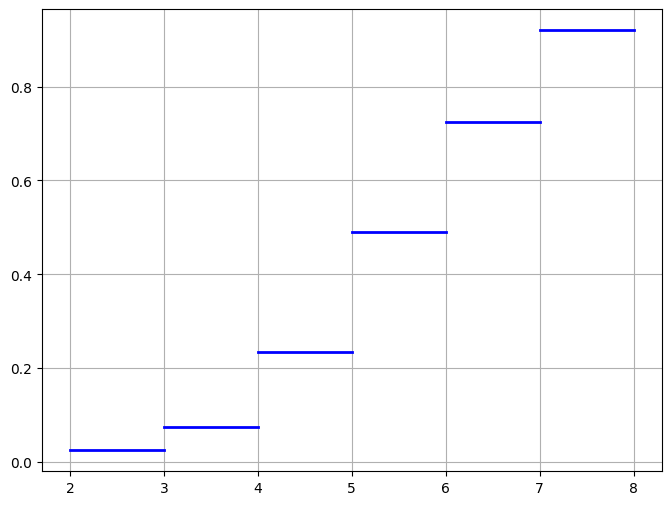

Sample mean =   5.53000
Sample variance =   2.03910
Sample standard deviation =   1.42797
Mode =   5.00000
Median =   5.50000
Sample skewness =  -0.23046
Sample kurtosis =  -0.42011
       X Relative Frequency Theoretical Frequency Absolute Difference
0      2            0.02500               0.01203             0.01297
1      3            0.05000               0.05329             0.00329
2      4            0.16000               0.14758             0.01242
3      5            0.25500               0.26156             0.00656
4      6            0.23500               0.28973             0.05473
5      7            0.19500               0.18339             0.01161
6      8            0.08000               0.05079             0.02921
7  Total            1.00000               1.00000             0.05473
  Characteristic    Sample Theoretical Absolute Difference Relative Difference
0           Mean   5.53000     5.51200             0.01800             0.00327
1       Variance   2.03910    

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

N = 200 #Sample
V = 163 #Variant

n = 5 + 163 % 20
p = 0.2 + 0.003 * V


seed = 420
rng = np.random.default_rng(seed=seed)

print("200 случайных значений из биномиального распределения с параметрами n = ", n, f"p = {p: .5f}")
x_binom = rng.binomial(n, p, N)
print(x_binom)

def task1(X_distribution):
  counts = np.unique(X_distribution, return_counts=True)
  X = counts[0]
  freq = counts[1]
  rel_freq = counts[1] / N
  cum_freq = np.cumsum(rel_freq)

  total_freq = freq.sum(axis=0)
  total_rel_freq = rel_freq.sum(axis=0)

  total_row = {
    'X': 'Total',
    'Frequency': total_freq,
    'Relative Frequency': total_rel_freq,
    'Cumulative Frequency': ''
  }

  df_freq = pd.DataFrame({
      'X': counts[0],
      'Frequency': [f"{val:.5f}" for val in freq],
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Cumulative Frequency': [f"{val:.5f}" for val in cum_freq]
      })
  df_freq.loc[len(df_freq)] = total_row

  print(df_freq)

  freq_table = pd.DataFrame({
    "Value": [f"{val:.5f}" for val in X],
    "Frequency": [f"{val:.5f}" for val in freq],
    "Relative Frequency": [f"{val:.5f}" for val in rel_freq],
    "Cumulative Frequency": [f"{val:.5f}" for val in cum_freq]
  })

  #calculate binomial distribution
  theo_freq = np.array([(math.comb(n, k) * (p ** k) * ((1-p) ** (n-k))) for k in X])

  #plot
  plt.figure(figsize=(8,6))
  plt.hist(
    X_distribution,
    bins=range(X_distribution.min(), X_distribution.max() + 2),
    density=True,
    rwidth=0.8,
    align='left',
    alpha=0.5,
    color='gray'
  )

  plt.title("Histogram of Relative Frequencies")
  plt.xlabel("k")
  plt.ylabel("Relative Frequency")
  plt.grid(True)
  plt.show()


  plt.figure(figsize = (8,6))
  plt.plot(X, rel_freq, marker = 'o', linestyle = '-', label = 'Relative Frequency')
  plt.plot(X, theo_freq, marker = 'o', linestyle = '--', color = 'red', label = 'Theoretical Probabilities')
  plt.xlabel("k")
  plt.ylabel("Probability")
  plt.title("Binomial Distribution")
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.figure(figsize = (8,6))
  for i in range(0, len(counts[0])-1):
    plt.plot([counts[0][i], counts[0][i+1]], [cum_freq[i], cum_freq[i]], color='b', linestyle='-', linewidth=2)
  plt.grid(True)
  plt.show()

  #1.4
  mean = np.array([X[i] * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample mean = ", f"{mean: .5f}")

  #1.5
  variance = np.array([((X[i] - mean) ** 2) * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample variance = ", f"{variance: .5f}")

  #1.6
  deviation = np.sqrt(variance)
  print("Sample standard deviation = ", f"{deviation: .5f}")

  #1.7
  modes = X[np.argwhere(freq == np.amax(freq))].flatten().tolist()
  mode = (modes[0] + modes[len(modes) - 1]) / 2
  print("Mode = ", f"{mode: .5f}")

  #1.8
  if len(X) % 2 == 0:
      median = (X[int(len(X)/2)] + X[int(len(X)/2) - 1]) / 2
  else:
      if 0.5 in X.tolist():
          median = X[cum_freq.tolist().index(0.5)]
      else:
          left = -1
          for element in cum_freq:
              if element < 0.5:
                  left += 1
              else:
                  right = left + 1
                  break
          median = (X[left] + X[right]) / 2
  print("Median = ", f"{median: .5f}")

  #1.9
  def sample_k_moment_around_mean(k, mean):
      return np.array([(X[i] - mean) ** k * rel_freq[i] for i in range(len(X))]).sum()
  sample_skeness = sample_k_moment_around_mean(3, mean) / deviation ** 3
  print("Sample skewness = ", f"{sample_skeness: .5f}")
  sample_kurtosis = sample_k_moment_around_mean(4, mean) / deviation ** 4 - 3
  print("Sample kurtosis = ", f"{sample_kurtosis: .5f}")

  abs_diff_freq = np.abs(theo_freq - rel_freq)
  freq_compare = pd.DataFrame({
      'X': X,
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Theoretical Frequency': [f"{val:.5f}" for val in theo_freq],
      'Absolute Difference': [f"{val:.5f}" for val in abs_diff_freq]
      })
  total_row_compare = {
      'X': 'Total',
      'Relative Frequency': f"{total_rel_freq: .5f}",
      'Theoretical Frequency': f"{1: .5f}",
      'Absolute Difference': f"{np.max(abs_diff_freq): .5f}"
      }
  freq_compare.loc[len(freq_compare)] = total_row_compare
  print(freq_compare)

  #1.10
  theo_mean = n * p
  theo_var = n * p * (1 - p)
  theo_deviation = np.sqrt(n * p * (1 - p))
  theo_skewness = ((1-p)-p) / np.sqrt(n * p * (1 - p))
  theo_kurtois = (1 - 6 * p * (1 - p)) / (n * p * (1 - p))
  theo_mode = np.floor((n + 1) * p)
  theo_median = np.floor(n * p)
  theo_values = np.array([theo_mean, theo_var, theo_deviation, theo_skewness, theo_kurtois, theo_mode, theo_median])
  real_values = np.array([mean, variance, deviation, sample_skeness, sample_kurtosis, mode, median])
  abs_differences = np.array([abs(mean - theo_mean), abs(variance - theo_var), abs(deviation - theo_deviation), abs(sample_skeness - theo_skewness), abs(sample_kurtosis - theo_kurtois), abs(mode - theo_mode), abs(median - theo_median)])
  rel_differences = np.array([abs_differences[i] / theo_values[i] for i in range(len(theo_values))])
  char_combine = pd.DataFrame({'Characteristic': ['Mean', 'Variance', 'Deviation', 'Skewness', 'Kurtosis', 'Mode', 'Median'],
                              'Sample': [f"{val:.5f}" for val in real_values],
                              'Theoretical': [f"{val:.5f}" for val in theo_values],
                              'Absolute Difference': [f"{val:.5f}" for val in abs_differences],
                              'Relative Difference': [f"{val:.5f}" for val in rel_differences]
                              })

  print(char_combine)

task1(x_binom)

200 случайных значений из геометрического распределения с параметром  p =  0.68900
[2 3 4 1 1 2 1 1 1 1 1 2 1 2 1 1 3 1 1 2 4 1 1 1 2 1 1 1 2 1 1 1 1 1 1 3 1
 3 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 3 1 3 1 1 1 1 1 1 2
 2 1 1 1 2 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 3 2 1 1 1 1
 3 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 4 2 1 1 1 3 4 1 1 1 1 1 3 4 1 2 2
 1 1 2 1 1 2 1 1 1 2 1 2 1 5 2 2 4 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 4 1 2]
       X  Frequency Relative Frequency Cumulative Frequency
0      1  137.00000            0.68500              0.68500
1      2   43.00000            0.21500              0.90000
2      3   12.00000            0.06000              0.96000
3      4    7.00000            0.03500              0.99500
4      5    1.00000            0.00500              1.00000
5  Total        200                1.0                     


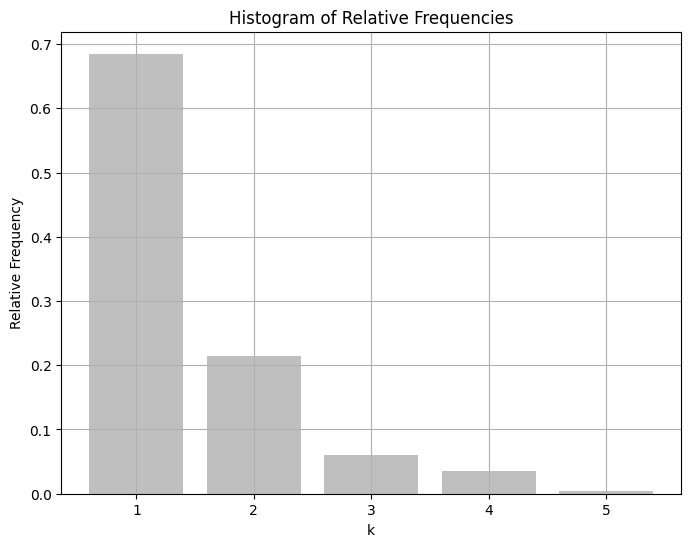

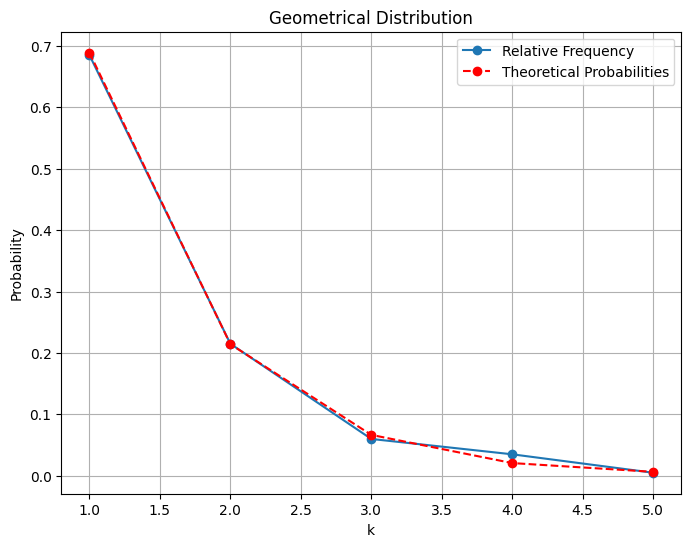

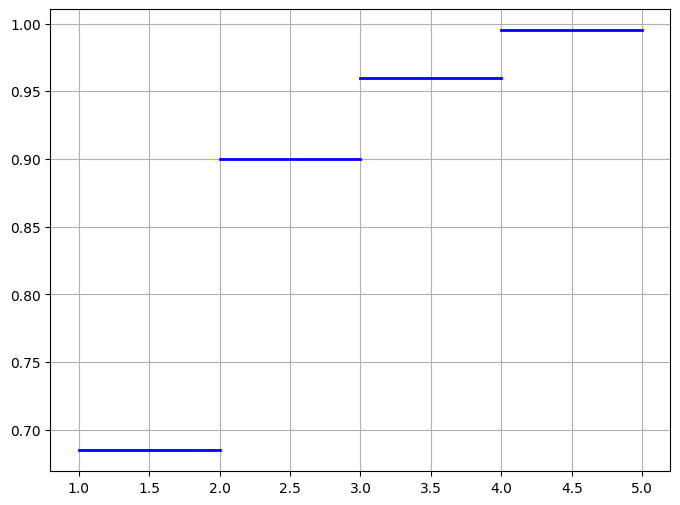

Sample mean =   1.46000
Sample variance =   0.63840
Sample standard deviation =   0.79900
Mode =   1.00000
Median =   3.00000
Sample skewness =   1.92454
Sample kurtosis =   3.44929
       X Relative Frequency Theoretical Frequency Absolute Difference
0      1            0.68500               0.68900             0.00400
1      2            0.21500               0.21428             0.00072
2      3            0.06000               0.06664             0.00664
3      4            0.03500               0.02073             0.01427
4      5            0.00500               0.00645             0.00145
5  Total            1.00000               1.00000             0.01427
  Characteristic   Sample Theoretical Absolute Difference Relative Difference
0           Mean  1.46000     1.45138             0.00862             0.00594
1       Variance  0.63840     0.65512             0.01672             0.02552
2      Deviation  0.79900     0.80940             0.01040             0.01284
3       Skewness

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

N = 200 #Sample
V = 163 #Variant

p = 0.2 + 0.003 * V

seed = 420
rng = np.random.default_rng(seed=seed)

print("200 случайных значений из геометрического распределения с параметром ", f"p = {p: .5f}")
x_geom = rng.geometric(p, N)
print(x_geom)

def task2(X_distribution):
  counts = np.unique(X_distribution, return_counts=True)
  X = counts[0]
  freq = counts[1]
  rel_freq = counts[1] / N
  cum_freq = np.cumsum(rel_freq)

  total_freq = freq.sum(axis=0)
  total_rel_freq = rel_freq.sum(axis=0)

  total_row = {
    'X': 'Total',
    'Frequency': total_freq,
    'Relative Frequency': total_rel_freq,
    'Cumulative Frequency': ''
  }

  df_freq = pd.DataFrame({
      'X': counts[0],
      'Frequency': [f"{val:.5f}" for val in freq],
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Cumulative Frequency': [f"{val:.5f}" for val in cum_freq]
      })
  df_freq.loc[len(df_freq)] = total_row

  print(df_freq)

  freq_table = pd.DataFrame({
    "Value": [f"{val:.5f}" for val in X],
    "Frequency": [f"{val:.5f}" for val in freq],
    "Relative Frequency": [f"{val:.5f}" for val in rel_freq],
    "Cumulative Frequency": [f"{val:.5f}" for val in cum_freq]
  })

  #calculate geometric distribution
  theo_freq = np.array([(p * ((1-p) ** (k-1))) for k in counts[0]])

  #plot
  plt.figure(figsize=(8,6))
  plt.hist(
    X_distribution,
    bins=range(X_distribution.min(), X_distribution.max() + 2),
    density=True,
    rwidth=0.8,
    align='left',
    alpha=0.5,
    color='gray'
  )

  plt.title("Histogram of Relative Frequencies")
  plt.xlabel("k")
  plt.ylabel("Relative Frequency")
  plt.grid(True)
  plt.show()


  plt.figure(figsize = (8,6))
  plt.plot(X, rel_freq, marker = 'o', linestyle = '-', label = 'Relative Frequency')
  plt.plot(X, theo_freq, marker = 'o', linestyle = '--', color = 'red', label = 'Theoretical Probabilities')
  plt.xlabel("k")
  plt.ylabel("Probability")
  plt.title("Geometrical Distribution")
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.figure(figsize = (8,6))
  for i in range(0, len(counts[0])-1):
    plt.plot([counts[0][i], counts[0][i+1]], [cum_freq[i], cum_freq[i]], color='b', linestyle='-', linewidth=2)
  plt.grid(True)
  plt.show()

  #1.4
  mean = np.array([X[i] * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample mean = ", f"{mean: .5f}")

  #1.5
  variance = np.array([((X[i] - mean) ** 2) * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample variance = ", f"{variance: .5f}")

  #1.6
  deviation = np.sqrt(variance)
  print("Sample standard deviation = ", f"{deviation: .5f}")

  #1.7
  modes = X[np.argwhere(freq == np.amax(freq))].flatten().tolist()
  mode = (modes[0] + modes[len(modes) - 1]) / 2
  print("Mode = ", f"{mode: .5f}")

  #1.8
  if len(X) % 2 == 0:
      median = (X[int(len(X)/2)] + X[int(len(X)/2) - 1]) / 2
  else:
      if 0.5 in X.tolist():
          median = X[cum_freq.tolist().index(0.5)]
      else:
          left = -1
          for element in cum_freq:
              if element < 0.5:
                  left += 1
              else:
                  right = left + 1
                  break
          median = (X[left] + X[right]) / 2
  print("Median = ", f"{median: .5f}")

  #1.9
  def sample_k_moment_around_mean(k, mean):
      return np.array([(X[i] - mean) ** k * rel_freq[i] for i in range(len(X))]).sum()
  sample_skeness = sample_k_moment_around_mean(3, mean) / deviation ** 3
  print("Sample skewness = ", f"{sample_skeness: .5f}")
  sample_kurtosis = sample_k_moment_around_mean(4, mean) / deviation ** 4 - 3
  print("Sample kurtosis = ", f"{sample_kurtosis: .5f}")

  abs_diff_freq = np.abs(theo_freq - rel_freq)
  freq_compare = pd.DataFrame({
      'X': X,
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Theoretical Frequency': [f"{val:.5f}" for val in theo_freq],
      'Absolute Difference': [f"{val:.5f}" for val in abs_diff_freq]
      })
  total_row_compare = {
      'X': 'Total',
      'Relative Frequency': f"{total_rel_freq: .5f}",
      'Theoretical Frequency': f"{1: .5f}",
      'Absolute Difference': f"{np.max(abs_diff_freq): .5f}"
      }
  freq_compare.loc[len(freq_compare)] = total_row_compare
  print(freq_compare)



  #1.10
  theo_mean = 1 / p
  theo_var = (1 - p) / (p ** 2)
  theo_deviation = np.sqrt((1 - p) / (p ** 2))
  theo_skewness = (2 - p) / np.sqrt(1 - p)
  theo_kurtois = 6 + p ** 2 / (1 - p)
  theo_mode = 1
  theo_median = np.round((-1 / np.log2(1 - p)))
  theo_values = np.array([theo_mean, theo_var, theo_deviation, theo_skewness, theo_kurtois, theo_mode, theo_median])
  real_values = np.array([mean, variance, deviation, sample_skeness, sample_kurtosis, mode, median])
  abs_differences = np.array([abs(real_values[i] - theo_values[i]) for i in range(len(theo_values))])
  rel_differences = np.array([abs_differences[i] / theo_values[i] for i in range(len(theo_values))])
  char_combine = pd.DataFrame({'Characteristic': ['Mean', 'Variance', 'Deviation', 'Skewness', 'Kurtosis', 'Mode', 'Median'],
                              'Sample': [f"{val:.5f}" for val in real_values],
                              'Theoretical': [f"{val:.5f}" for val in theo_values],
                              'Absolute Difference': [f"{val:.5f}" for val in abs_differences],
                              'Relative Difference': [f"{val:.5f}" for val in rel_differences]
                              })

  print(char_combine)

task2(x_geom)

200 случайных значений из распределения Пуассона с параметром  lambda =  0.51100
[3 1 0 0 1 0 1 1 0 1 0 2 0 0 1 0 0 1 0 0 1 1 0 1 0 0 2 2 0 0 0 0 0 0 0 0 0
 1 2 2 1 1 0 0 0 0 0 2 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0
 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 1 0 1 0 0 1 1 4 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 2 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 2 1 5 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 2 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0]
       X  Frequency Relative Frequency Cumulative Frequency
0      0  126.00000            0.63000              0.63000
1      1   57.00000            0.28500              0.91500
2      2   14.00000            0.07000              0.98500
3      3    1.00000            0.00500              0.99000
4      4    1.00000            0.00500              0.99500
5      5    1.00000            0.00500              1.00000
6  Total        200                1.0                     
             Interval  Frequency

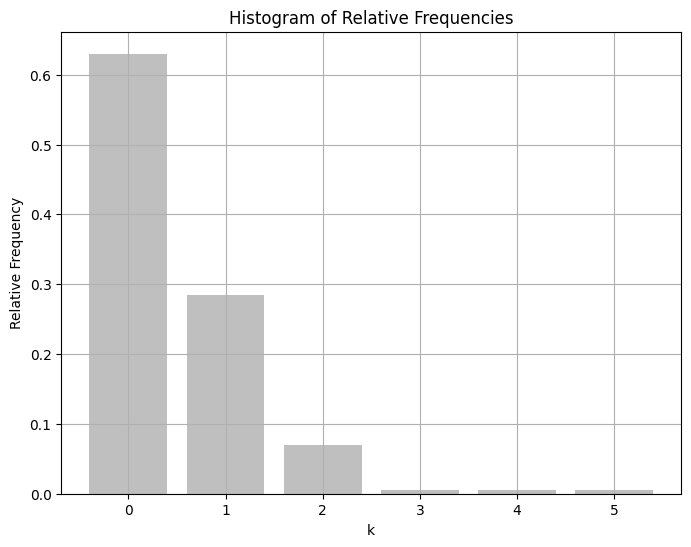

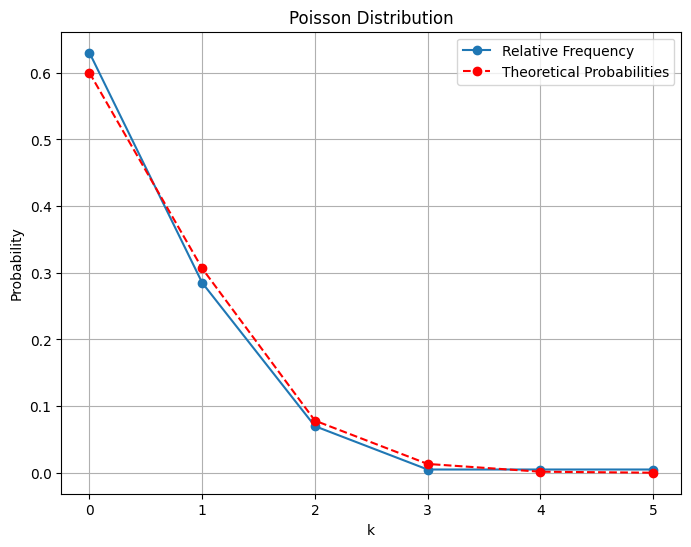

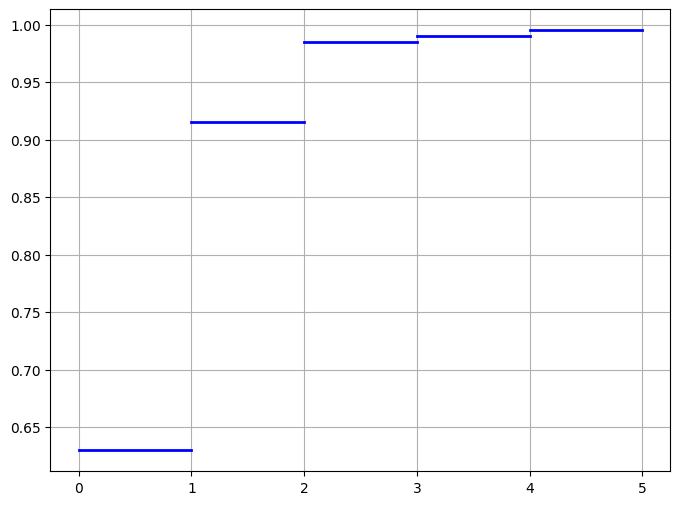

Sample mean =   0.48500
Sample variance =   0.57978
Sample standard deviation =   0.76143
Mode =   0.00000
Median =   2.50000
Sample skewness =   2.19125
Sample kurtosis =   7.30751
       X Relative Frequency Theoretical Frequency Absolute Difference
0      0            0.63000               0.59990             0.03010
1      1            0.28500               0.30655             0.02155
2      2            0.07000               0.07832             0.00832
3      3            0.00500               0.01334             0.00834
4      4            0.00500               0.00170             0.00330
5      5            0.00500               0.00017             0.00483
6  Total            1.00000               1.00000             0.03010
  Characteristic   Sample Theoretical Absolute Difference Relative Difference
0           Mean  0.48500     0.51100             0.02600             0.05088
1       Variance  0.57978     0.51100             0.06878             0.13459
2      Deviation  0.7614

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

N = 200 #Sample
V = 163 #Variant

lamda = 1 + ((-1) ** V) * (V * 0.003)

seed = 420
rng = np.random.default_rng(seed=seed)

print("200 случайных значений из распределения Пуассона с параметром ", f"lambda = {lamda: .5f}")
x_poisson = rng.poisson(lamda, N)
print(x_poisson)

def task3(X_distribution):
  counts = np.unique(X_distribution, return_counts=True)
  X = counts[0]
  freq = counts[1]
  rel_freq = counts[1] / N
  cum_freq = np.cumsum(rel_freq)

  total_freq = freq.sum(axis=0)
  total_rel_freq = rel_freq.sum(axis=0)

  total_row = {
    'X': 'Total',
    'Frequency': total_freq,
    'Relative Frequency': total_rel_freq,
    'Cumulative Frequency': ''
  }

  df_freq = pd.DataFrame({
      'X': counts[0],
      'Frequency': [f"{val:.5f}" for val in freq],
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Cumulative Frequency': [f"{val:.5f}" for val in cum_freq]
      })
  df_freq.loc[len(df_freq)] = total_row

  print(df_freq)

  step = 1 + np.log2(N)
  distance_between_step = (X.max() - X.min()) / step
  intervals = np.array([X.min() + i * distance_between_step for i in range(int(step))])
  intervals = np.append(intervals, X.max())
  intervals_freq = np.zeros(len(intervals)-1)
  intervals_relatvie_freq = np.zeros(len(intervals)-1)
  for i in range(len(intervals)-1):
    for j in range(len(X)):
      if intervals[i] <= X[j] < intervals[i+1]:
        intervals_freq[i] += freq[j]
        intervals_relatvie_freq[i] += rel_freq[j]

  intervals_cumulative_freq = np.cumsum(intervals_relatvie_freq)
  total_row = {
      'Interval': 'Total',
      'Frequency': total_freq,
      'Relative Frequency': total_rel_freq
      }
  df_freq_intervals = pd.DataFrame({'Interval': zip([f"{val:.5f}" for val in intervals[:-1]], [f"{val:.5f}" for val in intervals[1:]]),
                                    'Frequency': [f"{val:.5f}" for val in intervals_freq],
                                    'Relative Frequency': [f"{val:.5f}" for val in intervals_relatvie_freq]
                                    })
  df_freq_intervals.loc[len(df_freq_intervals)] = total_row
  print(df_freq_intervals)

  middle = np.array([(intervals[i] + intervals[i+1]) / 2 for i in range(len(intervals)-1)])
  df_freq_middle = pd.DataFrame({'Middle': [f"{val:.5f}" for val in middle],
                                 'Frequency': [f"{val:.5f}" for val in intervals_freq],
                                 'Relative Frequency': [f"{val:.5f}" for val in intervals_relatvie_freq]
                                 })
  df_freq_middle.loc[len(df_freq_intervals)] = total_row
  print(df_freq_middle)

  #calculate poisson distribution
  theo_freq = np.array([(lamda ** k) * np.exp(-lamda) / math.factorial(k) for k in counts[0]])
  intervals_theoretical_relatvie_freq = np.zeros(len(intervals)-1)
  for i in range(len(intervals)-1):
      for j in range(len(X)):
          if intervals[i] <= X[j] < intervals[i+1]:
              intervals_theoretical_relatvie_freq[i] += theo_freq[j]

  #plot
  plt.figure(figsize=(8,6))
  plt.hist(
    X_distribution,
    bins=range(X_distribution.min(), X_distribution.max() + 2),
    density=True,
    rwidth=0.8,
    align='left',
    alpha=0.5,
    color='gray'
  )

  plt.title("Histogram of Relative Frequencies")
  plt.xlabel("k")
  plt.ylabel("Relative Frequency")
  plt.grid(True)
  plt.show()


  plt.figure(figsize = (8,6))
  plt.plot(X, rel_freq, marker = 'o', linestyle = '-', label = 'Relative Frequency')
  plt.plot(X, theo_freq, marker = 'o', linestyle = '--', color = 'red', label = 'Theoretical Probabilities')
  plt.xlabel("k")
  plt.ylabel("Probability")
  plt.title("Poisson Distribution")
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.figure(figsize = (8,6))
  for i in range(0, len(counts[0])-1):
    plt.plot([counts[0][i], counts[0][i+1]], [cum_freq[i], cum_freq[i]], color='b', linestyle='-', linewidth=2)
  plt.grid(True)
  plt.show()

  #1.4
  mean = np.array([X[i] * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample mean = ", f"{mean: .5f}")

  #1.5
  variance = np.array([((X[i] - mean) ** 2) * rel_freq[i] for i in range(len(X))]).sum()
  print("Sample variance = ", f"{variance: .5f}")

  #1.6
  deviation = np.sqrt(variance)
  print("Sample standard deviation = ", f"{deviation: .5f}")

  #1.7
  modes = X[np.argwhere(freq == np.amax(freq))].flatten().tolist()
  mode = (modes[0] + modes[len(modes) - 1]) / 2
  print("Mode = ", f"{mode: .5f}")

  #1.8
  if len(X) % 2 == 0:
      median = (X[int(len(X)/2)] + X[int(len(X)/2) - 1]) / 2
  else:
      if 0.5 in X.tolist():
          median = X[cum_freq.tolist().index(0.5)]
      else:
          left = -1
          for element in cum_freq:
              if element < 0.5:
                  left += 1
              else:
                  right = left + 1
                  break
          median = (X[left] + X[right]) / 2
  print("Median = ", f"{median: .5f}")

  #1.9
  def sample_k_moment_around_mean(k, mean):
      return np.array([(X[i] - mean) ** k * rel_freq[i] for i in range(len(X))]).sum()
  sample_skeness = sample_k_moment_around_mean(3, mean) / deviation ** 3
  print("Sample skewness = ", f"{sample_skeness: .5f}")
  sample_kurtosis = sample_k_moment_around_mean(4, mean) / deviation ** 4 - 3
  print("Sample kurtosis = ", f"{sample_kurtosis: .5f}")

  abs_diff_freq = np.abs(theo_freq - rel_freq)
  freq_compare = pd.DataFrame({
      'X': X,
      'Relative Frequency': [f"{val:.5f}" for val in rel_freq],
      'Theoretical Frequency': [f"{val:.5f}" for val in theo_freq],
      'Absolute Difference': [f"{val:.5f}" for val in abs_diff_freq]
      })
  total_row_compare = {
      'X': 'Total',
      'Relative Frequency': f"{total_rel_freq: .5f}",
      'Theoretical Frequency': f"{1: .5f}",
      'Absolute Difference': f"{np.max(abs_diff_freq): .5f}"
      }
  freq_compare.loc[len(freq_compare)] = total_row_compare
  print(freq_compare)

  #1.10
  theo_mean = lamda
  theo_var= lamda
  theo_deviation = np.sqrt(lamda)
  theo_skewness = 1 / np.sqrt(lamda)
  theo_kurtois = 1 / lamda
  theo_mode = np.floor(lamda)
  theo_median = np.floor(lamda + 1/3 - 0.02/lamda)
  theo_values = np.array([theo_mean, theo_var, theo_deviation, theo_skewness, theo_kurtois, theo_mode, theo_median])
  real_values = np.array([mean, variance, deviation, sample_skeness, sample_kurtosis, mode, median])
  abs_differences = np.array([abs(real_values[i] - theo_values[i]) for i in range(len(theo_values))])
  rel_differences = []
  for i in range(len(theo_values)):
      if theo_values[i] == 0:
          rel_differences.append(np.nan)  # or "N/A"
      else:
          rel_differences.append(abs_differences[i] / theo_values[i])
  rel_differences = np.array(rel_differences)
  char_combine = pd.DataFrame({'Characteristic': ['Mean', 'Variance', 'Deviation', 'Skewness', 'Kurtosis', 'Mode', 'Median'],
                              'Sample': [f"{val:.5f}" for val in real_values],
                              'Theoretical': [f"{val:.5f}" for val in theo_values],
                              'Absolute Difference': [f"{val:.5f}" for val in abs_differences],
                              'Relative Difference': [f"{val:.5f}" for val in rel_differences]
                              })

  print(char_combine)

task3(x_poisson)